In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("HR_Attrition.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'HR_Attrition.csv'

In [ ]:
df.head()

In [ ]:
df.tail(10)

In [ ]:
df.describe()

Finding null indexes in a column

In [ ]:
null_mask=df["Age"].isnull()
null_indexes = null_mask[null_mask].index
null_indexes

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.at[3, 'DailyRate']

Creating subset

In [ ]:
df1=df[['Age', 'DailyRate']]
df1

In [ ]:
df2 = df1.copy()
df2

In [ ]:
#Retrieving 20th row

In [ ]:
df_row = df.loc[20]
df_row

Getting a range of rows

In [ ]:
df_rows = df.loc[20:30]
df_rows

Average years of employees at company

In [ ]:
average_years=df.YearsAtCompany.mean()
average_years

Ration of years at current role and years at company

In [ ]:
average_years_role=df.YearsInCurrentRole.mean()
ratio = average_years_role/ average_years
ratio

Finding Senior Developers

In [ ]:
senior_dev = df.YearsAtCompany > 10
senior_dev

In [ ]:
senior_developers_df = df[senior_dev]
senior_developers_df

can also be done in a single line

In [ ]:
senior_developers_df = df[df.YearsAtCompany > 10]
senior_developers_df

Showing more rows

In [ ]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(df[df.YearsAtCompany > 10])

In [ ]:
df.sort_values('Age', ascending=True)
df

In [ ]:
df.columns.str.strip() #Removes spaces

In [ ]:
df.columns.str.replace("Age","EmployeeAge") #Replacing strings

In [ ]:
df.describe(include=['object']) #Displays info about the colomns containing object datatype

In [ ]:
df['WorkLifeBalance']

In [ ]:
df.select_dtypes(['object'])

In [ ]:
for column in df:
    print('Col:', column,': No of unique values' ,df[column].nunique()) #no of unique values
    print(df[column].unique()) #all unique values
    print('-----')

In [ ]:
df['EducationField'].value_counts() #what value is repeated how many times

In [ ]:
for column in df:
    print( 'frequency of values: ' ,df[column].value_counts()) #no of unique values
    print('-----')

In [ ]:
df[df['Attrition']=='Yes'] #Conditional display

In [ ]:
df[(df['DistanceFromHome']<15) & (df['BusinessTravel']=='Travel_Rarely')]

In [ ]:
df.duplicated()

In [ ]:
#checking for duplicate values in productID
df['EmployeeNumber'].duplicated().sum()

#Discretization#
quantile based binning. Making categories out of a continuous data

In [ ]:
cats= ['Intern', 'Junior', 'Mid-level', 'Senior']
df['AgeRange']=pd.qcut(df['Age'], q=4, labels=cats)
df[['AgeRange', 'Age']]

In [ ]:
df['AgeRange'].value_counts()

## Week 3

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_new = pd.read_csv('xeek_train_subset (1).csv')

In [7]:
df_new

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,127.456139,NaN,3.607062,NaN,NaN,22.291321,NaN,NaN,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,128.403305,NaN,3.609151,NaN,NaN,22.230320,NaN,NaN,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,127.829262,NaN,3.594580,NaN,NaN,22.388054,NaN,NaN,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,126.552277,NaN,3.534883,NaN,NaN,23.331690,NaN,NaN,0.092334,30000


We can see NaN in the data

In [8]:
df_new.isnull()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False
133194,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False
133195,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False
133196,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,True,False,True,True,False,False


In [9]:
df_new['Z_LOC'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
133193    False
133194    False
133195    False
133196    False
133197    False
Name: Z_LOC, Length: 133198, dtype: bool

All the indexes with Nan values are True

In [10]:
df_new.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP              2744
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64

CHeck null values in each row

In [11]:
for col in df_new:
    print("Col name: ", col, "-missing values", df_new[col].isnull().sum())
    print("---------")

Col name:  WELL -missing values 0
---------
Col name:  DEPTH_MD -missing values 0
---------
Col name:  X_LOC -missing values 7393
---------
Col name:  Y_LOC -missing values 7393
---------
Col name:  Z_LOC -missing values 7393
---------
Col name:  GROUP -missing values 0
---------
Col name:  FORMATION -missing values 21566
---------
Col name:  CALI -missing values 192
---------
Col name:  RSHA -missing values 71159
---------
Col name:  RMED -missing values 7642
---------
Col name:  RDEP -missing values 7393
---------
Col name:  RHOB -missing values 25145
---------
Col name:  GR -missing values 0
---------
Col name:  NPHI -missing values 41473
---------
Col name:  PEF -missing values 32358
---------
Col name:  DTC -missing values 563
---------
Col name:  SP -missing values 39518
---------
Col name:  ROP -missing values 2744
---------
Col name:  DTS -missing values 121014
---------
Col name:  DCAL -missing values 76998
---------
Col name:  DRHO -missing values 27659
---------
Col name:  L

In [12]:
!pip install missingno

A python library to  find the presence and distribution of missing data within a df

In [13]:
import missingno as msno

<Axes: >

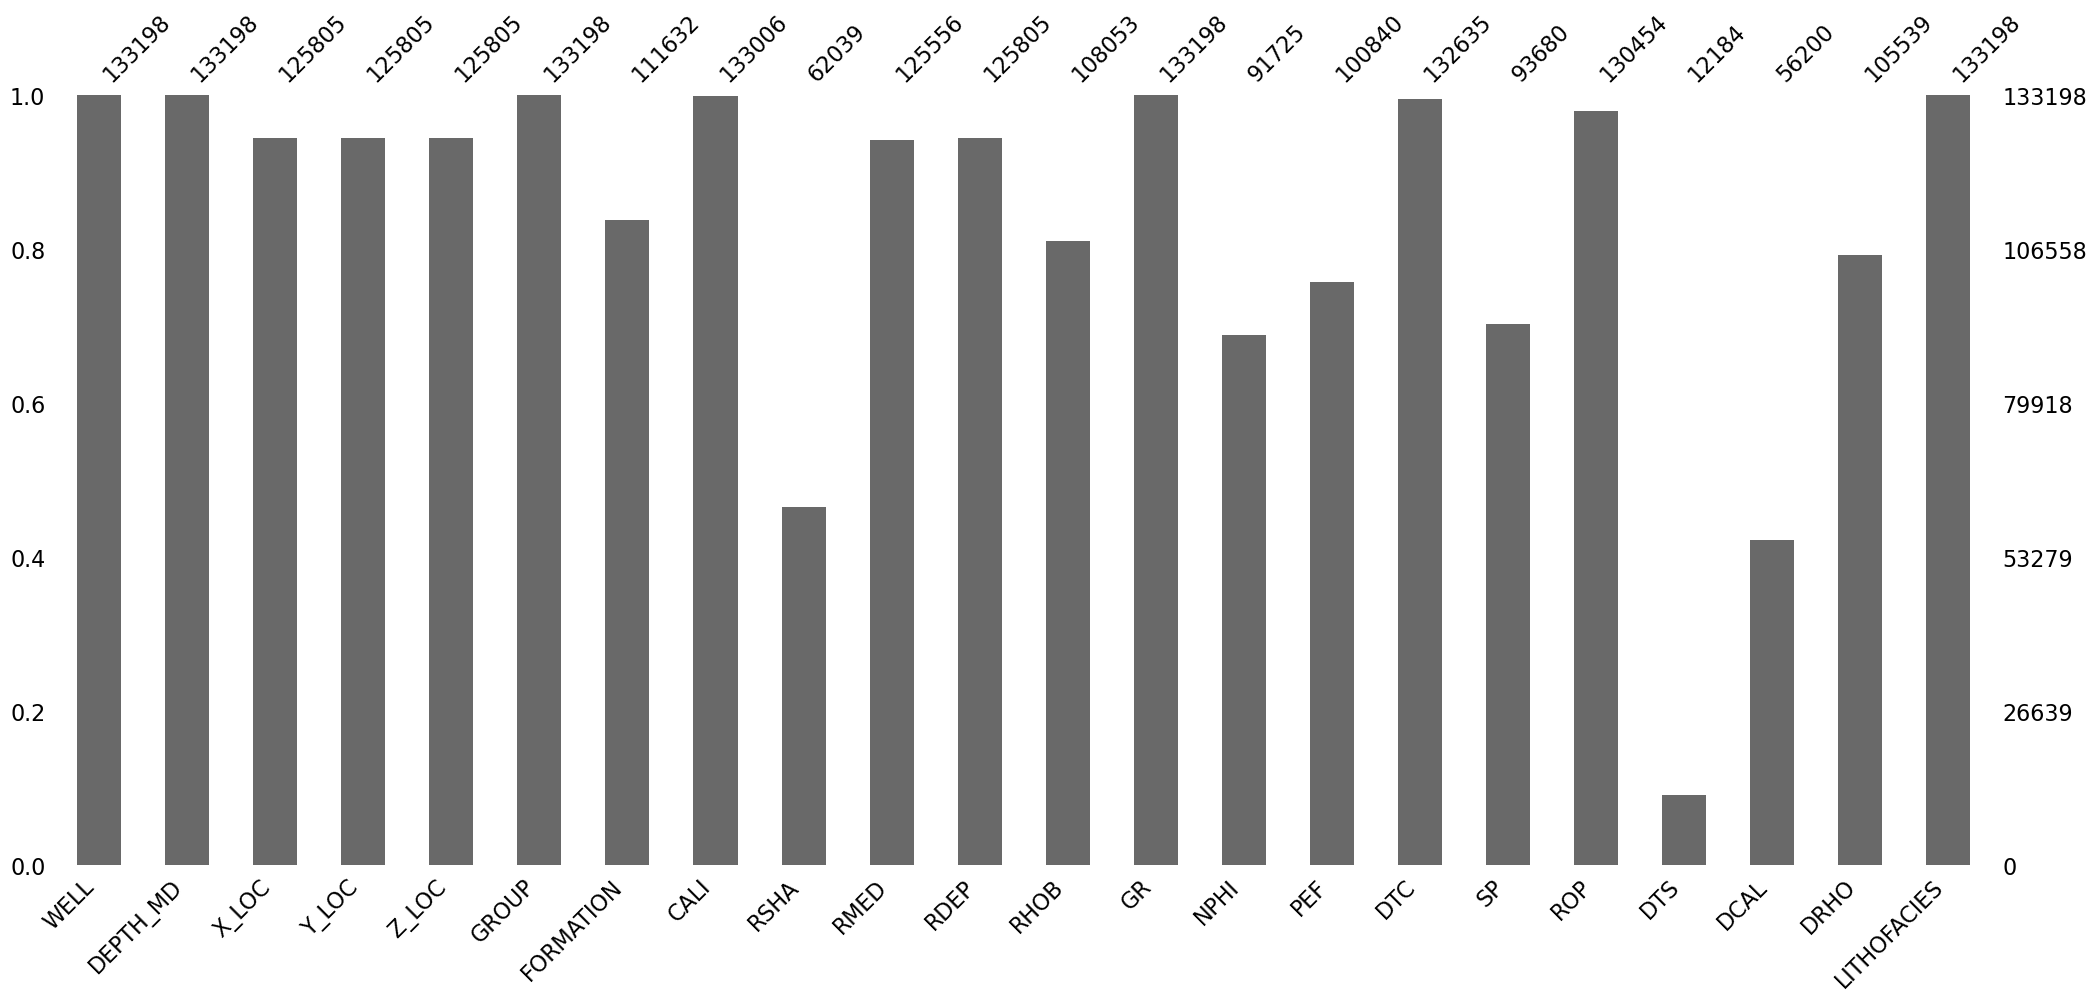

In [14]:
bar=msno.bar(df_new)
bar

In [15]:
# % of values missing in each column
values_list= list()
cols_list=list()
for col in df_new.columns:
    pct_missing = np.mean(df_new[col].isnull())*100 #Taking the mean of missing values
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list 
pct_missing_df['pct_missing'] = values_list 

pct_missing_df

,col,pct_missing
0,WELL,0.000000
1,DEPTH_MD,0.000000
2,X_LOC,5.550384
3,Y_LOC,5.550384
4,Z_LOC,5.550384
5,GROUP,0.000000
6,FORMATION,16.190934
7,CALI,0.144146
8,RSHA,53.423475
9,RMED,5.737323


<Axes: >

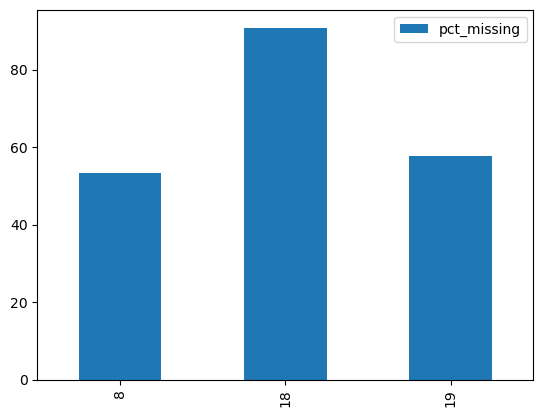

In [16]:
pct_missing_df.loc[pct_missing_df['pct_missing']>50].plot(kind='bar')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

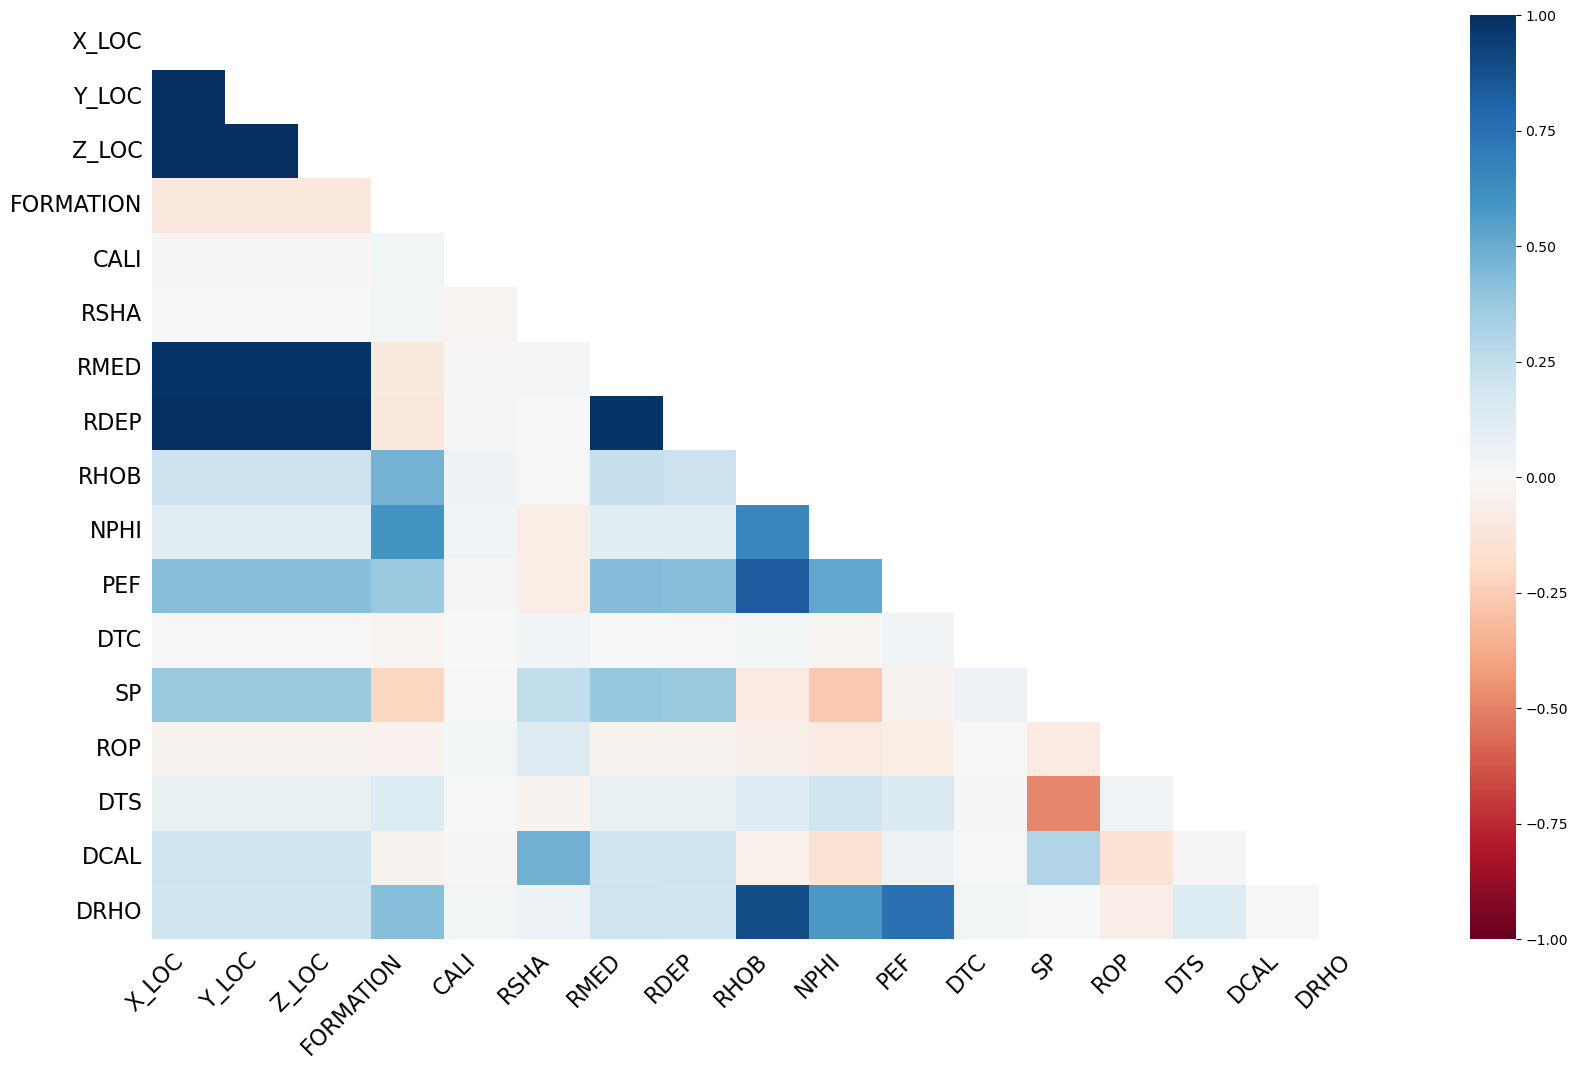

In [17]:
msno.heatmap(df_new)

<Axes: >

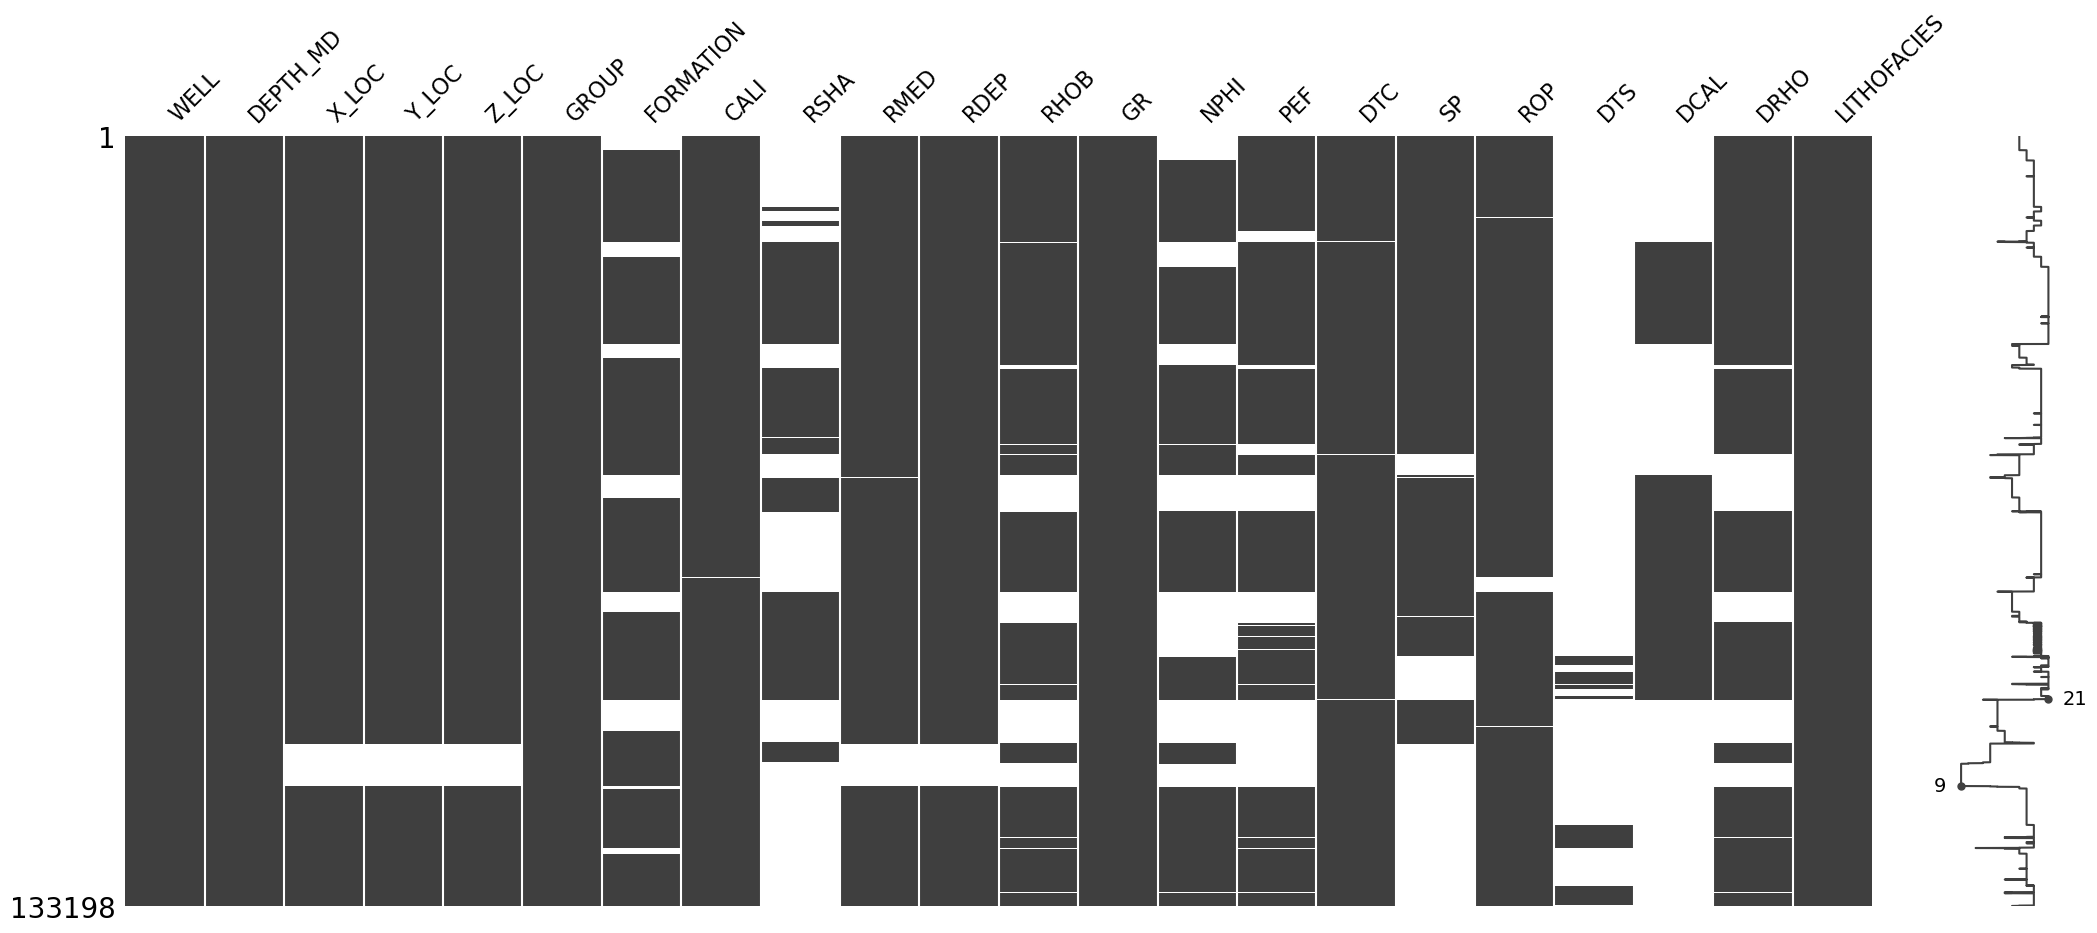

In [18]:
msno.matrix(df_new)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WELL         133198 non-null  object 
 1   DEPTH_MD     133198 non-null  float64
 2   X_LOC        125805 non-null  float64
 3   Y_LOC        125805 non-null  float64
 4   Z_LOC        125805 non-null  float64
 5   GROUP        133198 non-null  object 
 6   FORMATION    111632 non-null  object 
 7   CALI         133006 non-null  float64
 8   RSHA         62039 non-null   float64
 9   RMED         125556 non-null  float64
 10  RDEP         125805 non-null  float64
 11  RHOB         108053 non-null  float64
 12  GR           133198 non-null  float64
 13  NPHI         91725 non-null   float64
 14  PEF          100840 non-null  float64
 15  DTC          132635 non-null  float64
 16  SP           93680 non-null   float64
 17  ROP          130454 non-null  float64
 18  DTS          12184 non-n

<Axes: >

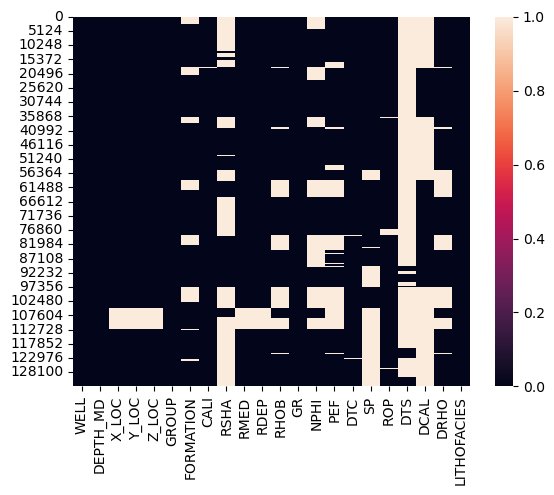

In [33]:
import seaborn as sns
sns.heatmap(df_new.isnull()) #Making heatmap of null values in df
#corelation of null values

<Axes: >

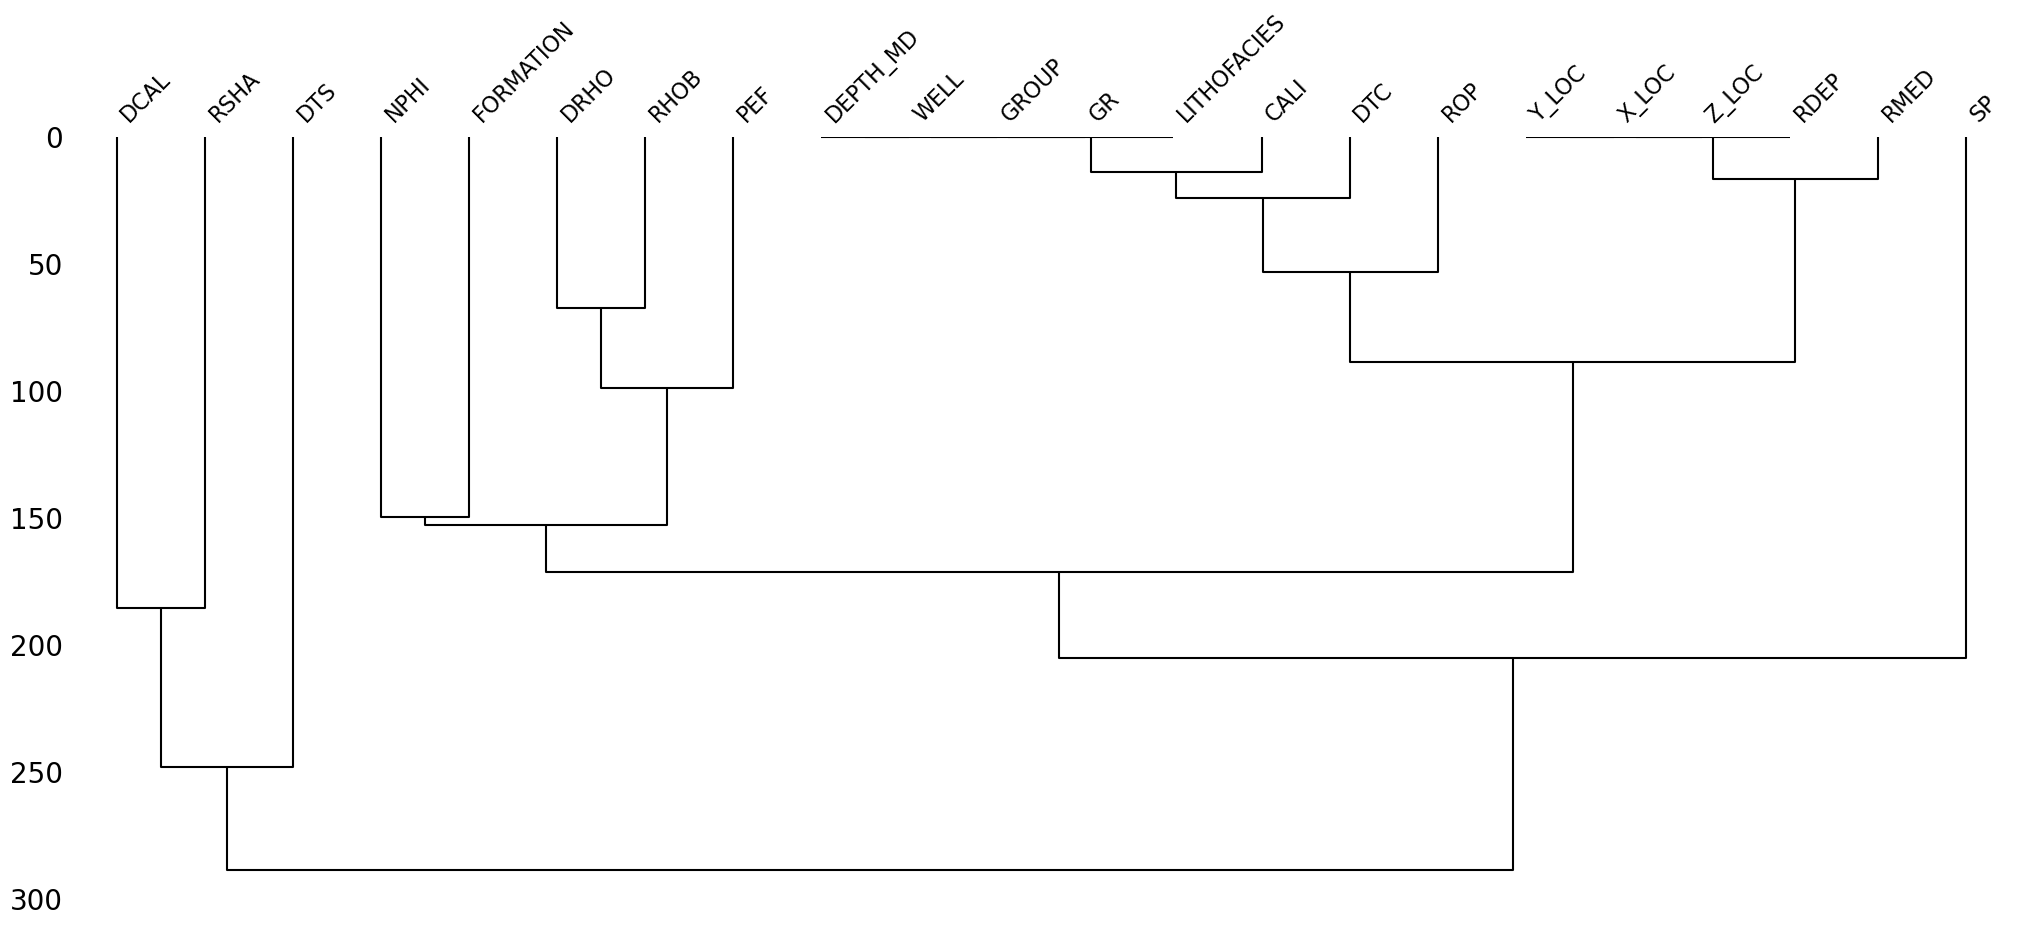

In [34]:
msno.dendrogram(df_new)